# Error surface in weight space
# Linear regression



Plot cost function $J=\frac{1}{2}(y - h)^2$ in weights space.

Each sample is  $y = ax + b$, where $a$ and $b$ - weights. $y$ and $x$ are fixed for each sample.


In [2]:
from matplotlib import pyplot as plt
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator

In [3]:
import math

In [58]:
def sample_func(x,y):
    def res(a):
        b = y - a*x
        return b
    return res

# Plots square error for one sample in weights space.
# Samples are functions y(x).
def plot_error_in_weight(sample, title):
    # y = ax + b
    # sample = [x , y]
    alim = [-20.,20.,1.]
    blim = [-20.,20.,1.]    
    a = np.arange(alim[0], alim[1]+alim[2], alim[2])
    b = np.arange(blim[0], blim[1]+blim[2], blim[2])
    A, B = np.meshgrid(a, b)

    error = .5*(sample[1] - A*sample[0] - B)**2
    J = error
    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.contourf(a, b, J, cmap=cmap, levels=levels)
    
    # draw lines
    xy_func = sample_func(sample[0],sample[1])
    b_ = xy_func(a)
    ax0.plot(a,b_,'b--')
    
    ax0.set_ylim(alim[0], alim[1])
    ax0.set_xlim(blim[0], blim[1])
    ax0.set_ylabel("B")
    
    fontdic = {
        'fontsize': 18
    }
    ax0.set_title(title, fontdict=fontdic)
    ax0.grid()
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    ax1.plot_surface(A,B,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("B")
    
    plt.show()

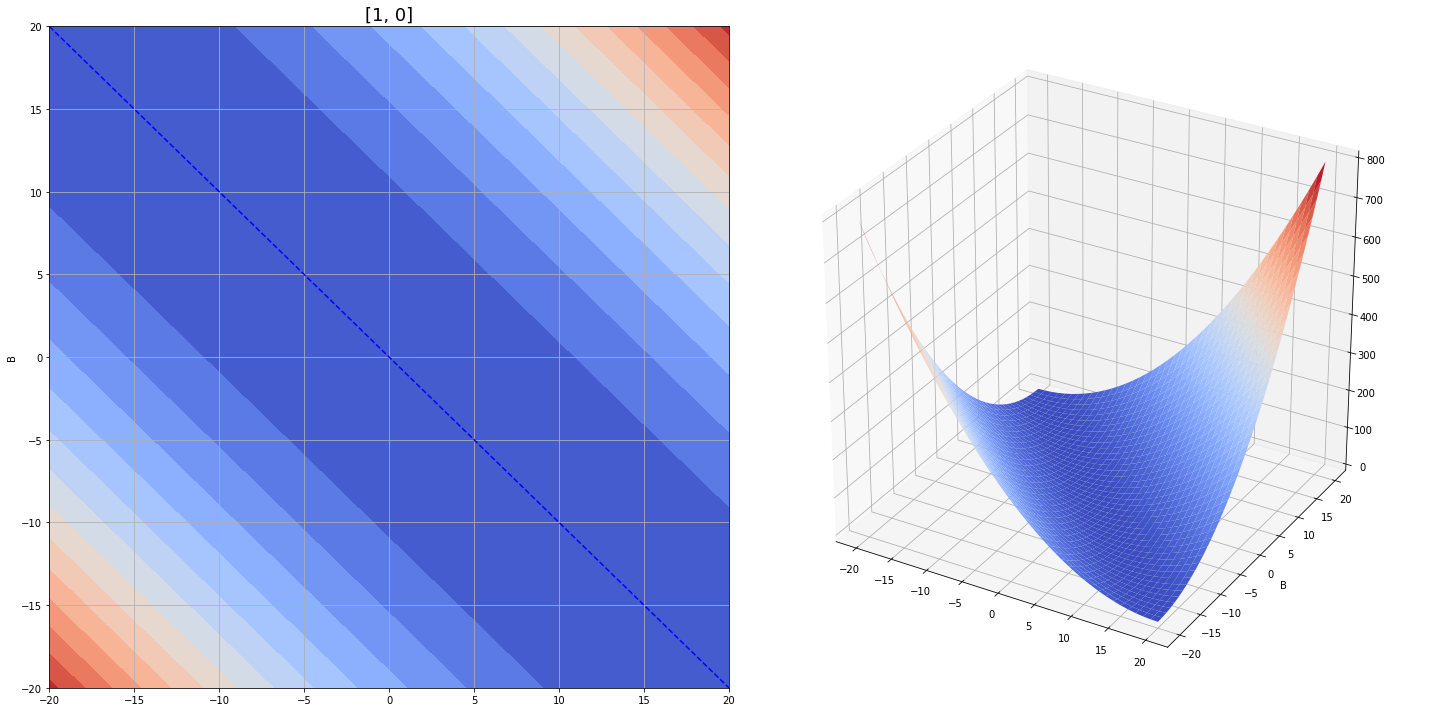

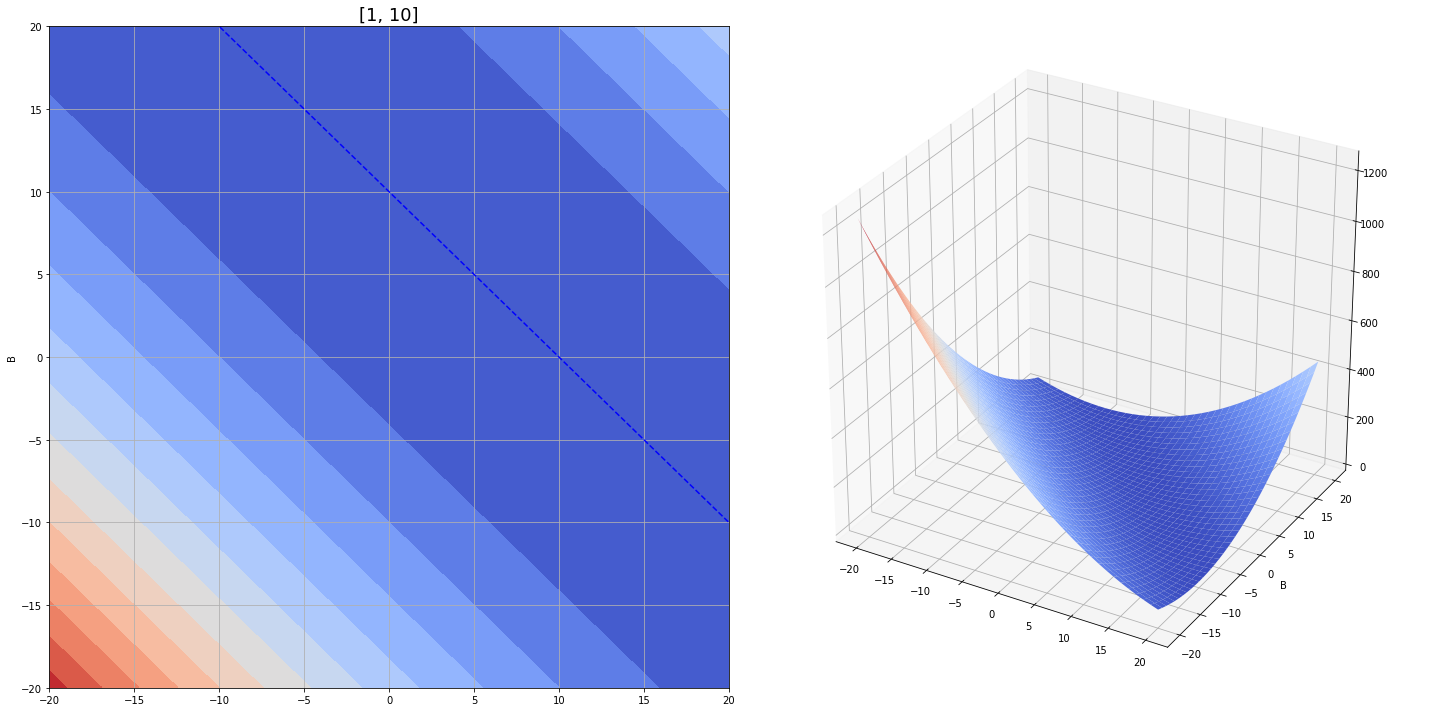

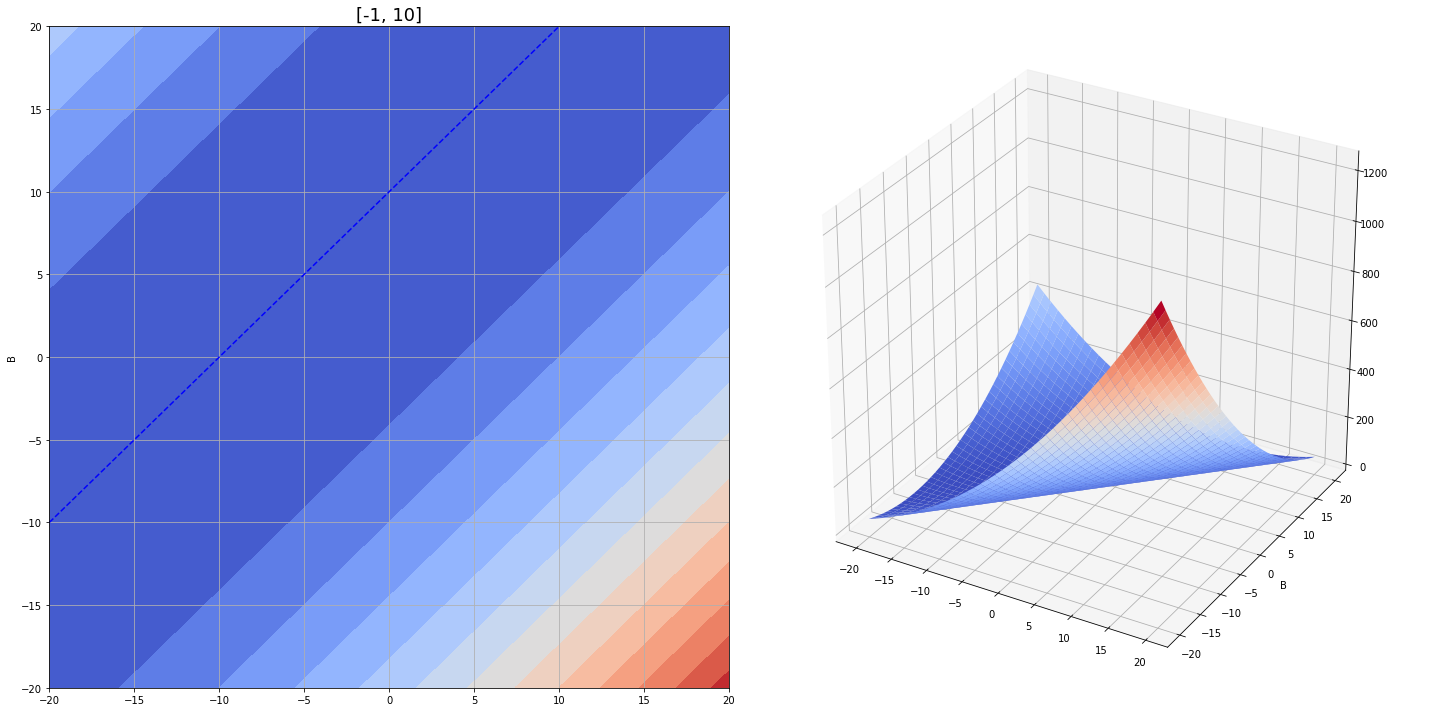

In [57]:
s1 = [1,0]
s2 = [1,10]
s3 = [-1,10]

for s in [s1, s2, s3]:
    plot_error_in_weight(s,str(s))

In [59]:
# Plots sum of square errors for all samples in weights space.
# Samples are functions y(x).
def plot_sum_error_in_weight(samples, title):
    # y = ax + b
    # sample = [x , y]
    alim = [-20.,20.,1.]
    blim = [-20.,20.,1.]    
    a = np.arange(alim[0], alim[1]+alim[2], alim[2])
    b = np.arange(blim[0], blim[1]+blim[2], blim[2])
    A, B = np.meshgrid(a, b)

    error = map(lambda sample:(sample[1] - A*sample[0] - B)**2., samples)
    J = sum(error)*.5
    fig = plt.figure(figsize=(20,10))
    levels = MaxNLocator(nbins=15).tick_values(J.min(), J.max())
    
    # pick the desired colormap, sensible levels, and define a normalization
    # instance which takes data values and translates those into levels.
    cmap = plt.get_cmap('coolwarm')
        
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.contourf(a, b, J, cmap=cmap, levels=levels)
    
    # draw lines
    for sample in samples:
        xy_func = sample_func(sample[0],sample[1])
        b_ = xy_func(a)
        ax0.plot(a,b_,'b--')
    
    ax0.set_ylim(alim[0], alim[1])
    ax0.set_xlim(blim[0], blim[1])
    ax0.set_ylabel("B")
    
    fontdic = {
        'fontsize': 18
    }
    ax0.set_title(title, fontdict=fontdic)
    ax0.grid()
    # adjust spacing between subplots so `ax1` title and `ax0` tick labels
    # don't overlap
    fig.tight_layout()
    
    ax1 = fig.add_subplot(1, 2, 2, projection='3d')
    ax1.plot_surface(A,B,J, cmap=cm.coolwarm,
                          linewidth=0, antialiased=True)
    ax1.set_ylabel("B")
    
    # fig.colorbar(surf,shrink=0.5, aspect=5)
    plt.show()

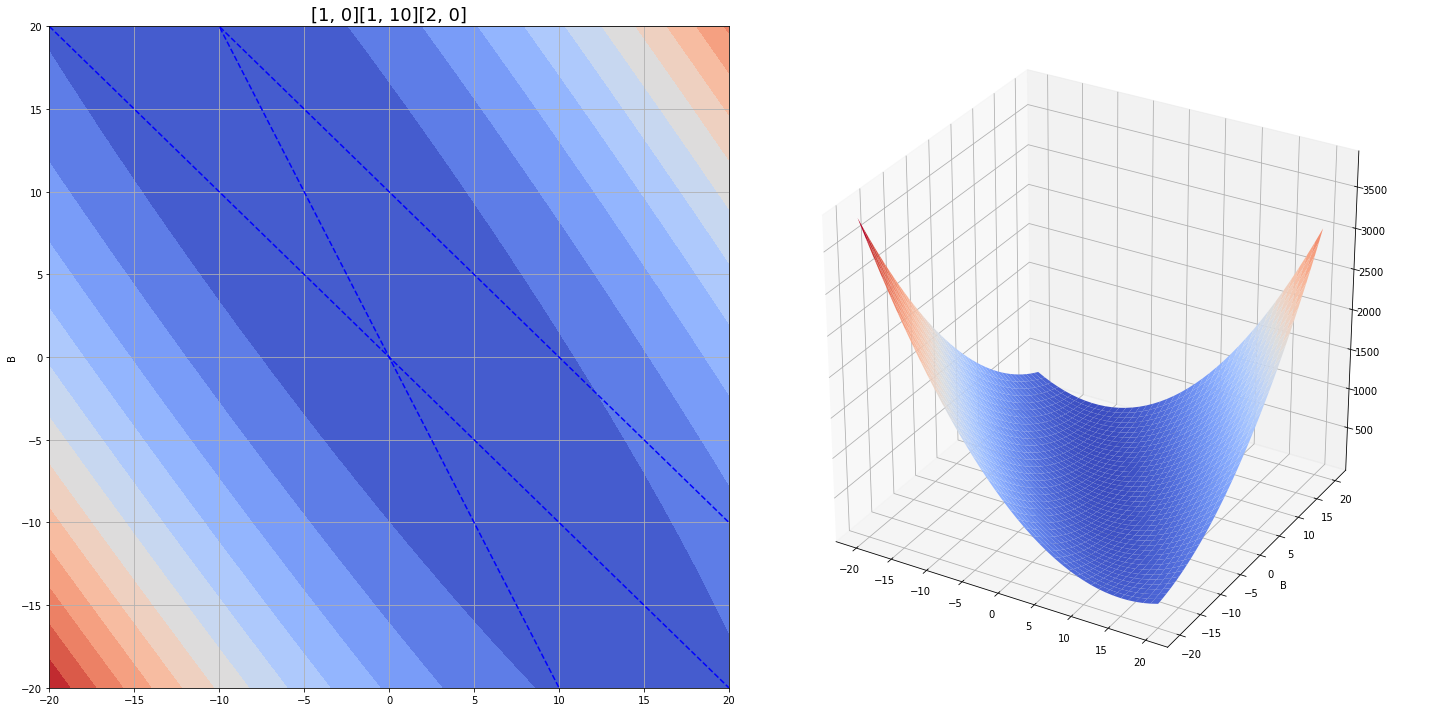

In [61]:
s1 = [1,0]
s2 = [1,10]
s3 = [2,0]

s = [s1, s2, s3]
plot_sum_error_in_weight(s,str(s1) + str(s2) + str(s3))